Code testing 2, simple convolution

In [1]:
import numpy as np
import tensorflow as tf
import time
from tensorflow.python.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.python.keras.models import Model, Sequential
from tensorflow.python.keras import regularizers

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [32]:
# setup parameters
num_classes = 8
classes = ['Airbus320', 'Airbus380', 'Boeing737', 'Boeing747', 'Boeing757', 'Boeing777', 'Boeing787', 'ERJ190']
target_size = (100,150)
datapath_train = '../dataset2/train'
datapath_val = '../dataset2/val'

# hyper-parameters
lam = .01
batch_size = 64
lr = 1e-3
beta_1 = 0.9
beta_2 = 0.999
fcnum = 0
layer_cut = -1

In [33]:
# build model
inputs = Input(shape=(*target_size,3))
x = Flatten()(inputs)

x = Dense(200, kernel_initializer='glorot_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(lam))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(.5)(x)
x = Dense(100, kernel_initializer='glorot_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(lam))(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(.5)(x)
outputs = Dense(num_classes, activation='softmax', kernel_initializer='glorot_normal', bias_initializer='zeros', kernel_regularizer=regularizers.l2(lam))(x)

model = Model(inputs, outputs)

In [34]:
train_datagen = ImageDataGenerator(
    rescale = 1./147, #preprocessing_function=preprocess_input_new,
    samplewise_center=True,
    rotation_range=0.0,
    horizontal_flip=False)

val_datagen = ImageDataGenerator(rescale = 1./147, samplewise_center=True) #preprocessing_function=preprocess_input

train_gen = train_datagen.flow_from_directory(
    datapath_train, 
    target_size=target_size, 
    batch_size=batch_size, 
    classes=classes,
    class_mode='categorical',
    shuffle=True)

val_gen = val_datagen.flow_from_directory(
    datapath_val, 
    target_size=target_size, 
    batch_size=batch_size, 
    classes=classes,
    class_mode='categorical',
    shuffle=True)

Found 1000 images belonging to 8 classes.
Found 599 images belonging to 8 classes.


In [35]:
#set optimizer and loss 
opt = tf.keras.optimizers.Adam(lr=lr, beta_1=beta_1, beta_2=beta_2)
loss = 'categorical_crossentropy'

#compile model
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [36]:
#train model
epochs = 10
history = model.fit_generator(
        train_gen,
        epochs=epochs,
        validation_data=val_gen)

Epoch 1/10
16/16 [==============================] - 5s 291ms/step - loss: 7.3471 - acc: 0.1345 - val_loss: 8.4617 - val_acc: 0.1319
Epoch 2/10
16/16 [==============================] - 3s 175ms/step - loss: 7.0773 - acc: 0.1804 - val_loss: 6.4531 - val_acc: 0.1669
Epoch 3/10
16/16 [==============================] - 3s 192ms/step - loss: 5.6903 - acc: 0.2310 - val_loss: 5.1047 - val_acc: 0.1703
Epoch 4/10
16/16 [==============================] - 3s 177ms/step - loss: 4.6716 - acc: 0.2292 - val_loss: 4.3749 - val_acc: 0.1937
Epoch 5/10
16/16 [==============================] - 3s 176ms/step - loss: 4.1281 - acc: 0.2446 - val_loss: 4.0519 - val_acc: 0.1686
Epoch 6/10
16/16 [==============================] - 3s 186ms/step - loss: 3.8467 - acc: 0.2788 - val_loss: 3.9233 - val_acc: 0.1669
Epoch 7/10
16/16 [==============================] - 3s 198ms/step - loss: 3.7106 - acc: 0.2801 - val_loss: 3.8113 - val_acc: 0.1653
Epoch 8/10
16/16 [==============================] - 3s 170ms/step - loss: 3.

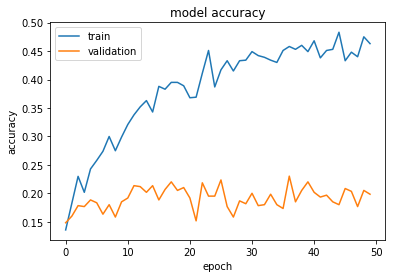

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
for i, lay in enumerate(model.layers):
    print(i, lay.name, lay.output_shape, lay.trainable)
    if 'mixed' in lay.name:
        print()

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100, 150, 3)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 45000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               9000200   
_________________________________________________________________
batch_normalization_1 (Batch (None, 200)               800       
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
__________

In [37]:
test_gen = val_datagen.flow_from_directory(
    '../dataset2/test', 
    target_size=target_size, 
    batch_size=batch_size, 
    classes=classes,
    class_mode='categorical',
    shuffle=True)

model.evaluate_generator(test_gen)

Found 599 images belonging to 8 classes.


[3.604876079623011, 0.19365609361353223]